In [36]:
#Importing Libraries
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

In [37]:
cricket = pd.read_csv("Cricket.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)
cricket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
Player    79 non-null object
Span      79 non-null object
Mat       79 non-null int64
Inns      79 non-null int64
NO        79 non-null int64
Runs      79 non-null int64
HS        79 non-null object
Ave       79 non-null float64
BF        79 non-null int64
SR        79 non-null float64
100       79 non-null int64
50        79 non-null int64
0         79 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [38]:
df=cricket[["Ave","SR"]]
df

,Ave,SR
0,44.83,86.23
1,41.98,78.86
2,42.03,80.39
3,32.36,91.20
4,33.37,78.96
5,39.52,74.24
6,44.36,72.89
7,41.02,73.70
8,39.16,71.24
9,40.48,79.51


In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_normal=scaler.fit_transform(df)
ff=pd.DataFrame(df_normal)
ff.columns=['Avg','SR']
ff

,Avg,SR
0,1.072294,0.703152
1,0.587725,-0.044139
2,0.596226,0.110997
3,-1.047909,1.207091
4,-0.876185,-0.034000
5,0.169465,-0.512591
6,0.992383,-0.649476
7,0.424501,-0.567345
8,0.108256,-0.816780
9,0.332688,0.021768


In [40]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [41]:
hopkins(ff)

0.7317465662851836

In [42]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(ff)
    sse_.append([k, silhouette_score(ff, kmeans.labels_)])

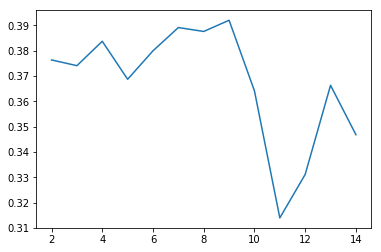

In [43]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

In [44]:
# Kmeans with K=4
model_clus4 = KMeans(n_clusters = 4, max_iter=50)
model_clus4.fit(ff)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [45]:
cricket.columns

Index(['Player', 'Span', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR',
       '100', '50', '0'],
      dtype='object')

In [46]:
cricket.index = pd.RangeIndex(len(cricket.index))
RFM_km = pd.concat([cricket, pd.Series(model_clus4.labels_)], axis=1)
RFM_km.columns = ['Player', 'Span', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR','100', '50', '0', 'ClusterID']


,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,ClusterID
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,2
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,0
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,0
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,3
5,Inzamam-ul-Haq (Asia/PAK),1991-2007,378,350,53,11739,137*,39.52,15812,74.24,10,83,20,0
6,JH Kallis (Afr/ICC/SA),1996-2014,328,314,53,11579,139,44.36,15885,72.89,17,86,17,0
7,SC Ganguly (Asia/INDIA),1992-2007,311,300,23,11363,183,41.02,15416,73.70,22,72,16,0
8,R Dravid (Asia/ICC/INDIA),1996-2011,344,318,40,10889,153,39.16,15284,71.24,12,83,13,0
9,BC Lara (ICC/WI),1990-2007,299,289,32,10405,169,40.48,13086,79.51,19,63,16,0


In [47]:
RFM_km[RFM_km["Player"].str.contains("Rich")]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,ClusterID
42,IVA Richards (WI),1975-1991,187,167,24,6721,189*,47.00,7451,90.20,11,45,7,2
47,RB Richardson (WI),1983-1996,224,217,30,6248,122,33.41,9801,63.74,5,44,8,3


In [29]:
# analysis of clusters formed


km_clusters_Avg = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).Avg.mean())
km_clusters_SR = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).SR.mean())


In [31]:
df = pd.concat([pd.Series([0,1,2,3]), km_clusters_Avg, km_clusters_SR], axis=1)
df.columns = ["ClusterID", "Amount_mean_AVG", "Frequency_mean_SR",]
df.head()

,ClusterID,Amount_mean_AVG,Frequency_mean_SR
0,0,33.949355,74.014839
1,1,41.484444,75.751852
2,2,35.409167,94.175833
3,3,49.546667,88.273333


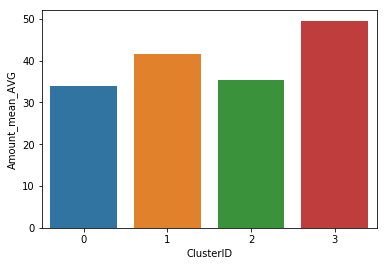

In [32]:
sns.barplot(x=df.ClusterID, y=df.Amount_mean_AVG)

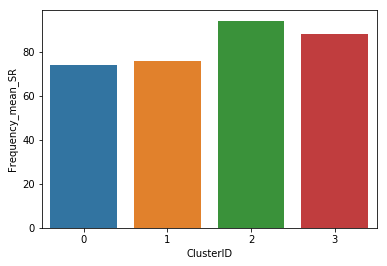

In [34]:
sns.barplot(x=df.ClusterID,y=df.Frequency_mean_SR)